## Observations and Insights 

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Display the data table for preview
mouse_df['Mouse ID'].value_counts()

g989    13
a251    10
a492    10
q633    10
j989    10
        ..
u153     1
o848     1
x226     1
t573     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Resource: https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

mouse_df_cl = mouse_df[~mouse_df['Mouse ID'].isin(['g989'])]
mouse_df_cl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_df_cl['Mouse ID'].value_counts()

a251    10
m546    10
q633    10
j989    10
t198    10
        ..
f932     1
d133     1
o848     1
x226     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

In [8]:
mouse_df_cl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg_summary_df = mouse_df_cl.groupby('Drug Regimen')

# Mean, median, variance, standard deviation, and SEM of the tumor volume by drug 
tumor_mean = drug_reg_summary_df['Tumor Volume (mm3)'].mean()
tumor_median = drug_reg_summary_df['Tumor Volume (mm3)'].median()
tumor_variance = drug_reg_summary_df ['Tumor Volume (mm3)'].var()
tumor_stdev = drug_reg_summary_df['Tumor Volume (mm3)'].std()
tumor_sem = drug_reg_summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drug_reg_summary_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_variance,
                                    'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

drug_reg_summary_df.head()



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#mouse_df_cl.groupby(['Drug Regimen']).mean()

#NEEDS WORK

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

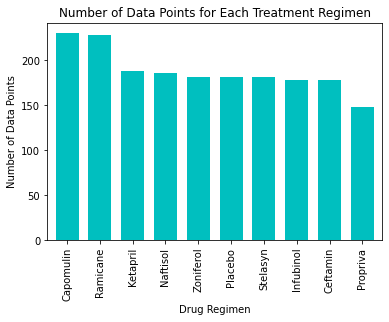

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Pandas bar plots are categorical 


# Creat a dataframe that calcuates # of measurements taken on each drug
bar_plot = mouse_df_cl['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3, color=('c'))

# Set labels for axes
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")

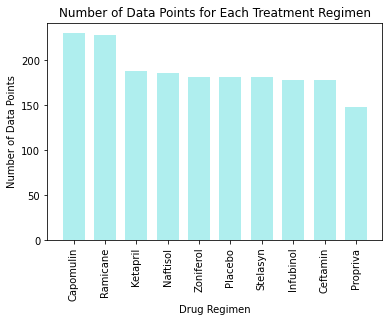

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Pyplot bar plots are numeric

# Calcuate # of measurements taken on each drug
counts = mouse_df_cl['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar plot with the length of the 'counts' series
plt.bar(x_axis, counts, width = 0.7, zorder=3, color=('paleturquoise'))

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

plt.show()

In [66]:
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [13]:
# Count males and females
m_f = mouse_df_cl['Sex'].value_counts()
m_f

Male      958
Female    922
Name: Sex, dtype: int64

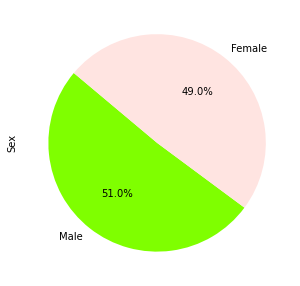

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plot = m_f.plot.pie(y='Distribution of Sex', figsize=(5, 5), colors = ["chartreuse", "mistyrose"], autopct="%1.1f%%", startangle=140)

# The colors of each section of the pie chart
#colors = ["mistyrose", "chartreuse"]

([<matplotlib.patches.Wedge at 0x7fea13a7a040>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

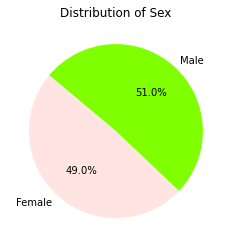

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["mistyrose", "chartreuse"]

# Add labels
plt.title("Distribution of Sex")

# Display the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a dataframe with the last (greatest) timepoint for each mouse
max_timept_df = pd.DataFrame(mouse_df_cl.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_df_cl = pd.merge(mouse_df_cl, max_timept_df, on='Mouse ID')
merged_mouse_df_cl.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Create a for loop to locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimen:
        
    # Create a datafram cont
    four_drug_df = merged_mouse_df_cl.loc[merged_mouse_df_cl['Drug Regimen']== drug]
        
    # Create a subset of the previous dataframe to show the final tumor volume
    final_volume_df = four_drug_df.loc[four_drug_df['Timepoint'] == four_drug_df['Timepoint_y']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_vol_data.append(values)
    
    
# Determine outliers using upper and lower bounds

    
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")   

KeyError: 'Timepoint'

In [82]:
four_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
1440,r157,Capomulin,Male,22,25,5,45.597064,0,15
1441,r157,Capomulin,Male,22,25,10,46.059608,0,15


In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

df = TBD

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()


## Line and Scatter Plots

In [19]:
# Determine max mouse weight
print(mouse_df_cl["Weight (g)"].max())
print(mouse_df_cl["Weight (g)"].min())

30
15


In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# # Isolate Capomulin into a dataframe
# capomulin_df = mouse_df_cl.loc[mouse_df_cl['Drug Regimen'] == 'Capomulin']

# # Find the average tumor volume by mouse and create a dataframe
# tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())

# x = capomulin_df['Weight (g)']
# y = tumor_vol_df['Tumor Volume (mm3)']

# # Create the scatter plot
# # plt.scatter(capomulin_df['Weight (g)'], tumor_vol_df['Tumor Volume (mm3)'], marker="o", facecolors="paleturquoise", linewidth=1)
# # plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")
# plt.scatter(x, y)

# # Set limits on x and y axis
# # plt.xlim(0, 50)
# # plt.ylim(0, 50)

# # Add labels
# plt.title("Capomulin - Avg. Tumor Volume vs Mouse Weight")
# plt.xlabel("Mouse Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")

# color map https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
